- AUPRC(Area under the Precision-Recall Curve) 구현
- Recall, Precision 구현

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
index = [i for i in range(1, 21)]
label = ['p', 'p', 'n', 'p', 'p', 'p', 'n', 'n', 'p', 'n', 'p', 'n', 'p', 'n', 'n', 'n', 'p', 'n', 'p', 'n']
probability = [0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1]

In [6]:
data = pd.DataFrame({'index':index, 'label':label, 'probability':probability}
                    )
data

,index,label,probability
0,1,p,0.900
1,2,p,0.800
2,3,n,0.700
3,4,p,0.600
4,5,p,0.550
5,6,p,0.540
6,7,n,0.530
7,8,n,0.520
8,9,p,0.510
9,10,n,0.505


- Precision: 예측을 True로 했을 때, 실제로 True일 확률
- Recall: 실제로 True일 때, 예측을 True라고 했을 확률

In [7]:
len(data[data['probability']>=0.1])

,index,label,probability
0,1,p,0.9


In [12]:
def precision_recall(df):
    Precision = []
    Recall = []
    
    P = len(df[df['label']=='p']) #positive 개수
    N = len(df[df['label']=='n']) #negative 개수
    
    for i in data['probability']:
        precision_tmp = data[data['probability']>=i] 
        #true positive
        TP = len(precision_tmp[precision_tmp['label']=='p']) #예측을 true라고 한 개수
        precision = round(TP/len(precision_tmp),2) #예측을 true라고 했을 때, 실제 true일 확률
        recall = TP/P #실제 양성인 P에서 예측을 True로 했을 비율
        Precision.append(precision)
        Recall.append(recall)
        
    return Precision, Recall

In [14]:
precision, recall = precision_recall(data)
print(precision)
print(recall)

[1.0, 1.0, 0.67, 0.75, 0.8, 0.83, 0.71, 0.62, 0.67, 0.6, 0.64, 0.58, 0.62, 0.57, 0.53, 0.5, 0.53, 0.5, 0.53, 0.5]
[0.1, 0.2, 0.2, 0.3, 0.4, 0.5, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 1.0, 1.0]


AURPC 계산
- 사다리꼴 넓이

In [18]:
#처음 리스트 원소에 0 추가
auprc_p = [0] + precision
auprc_r = [0] + recall

AUPRC=0
for i in range(1, len(auprc_p)):
    #사다리꼴 넓이
    tmp_auc = (auprc_p[i-1]+auprc_p[i]) * (auprc_r[i]-auprc_r[i-1]) / 2
    AUPRC+= tmp_auc


print(AUPRC)

0.6695


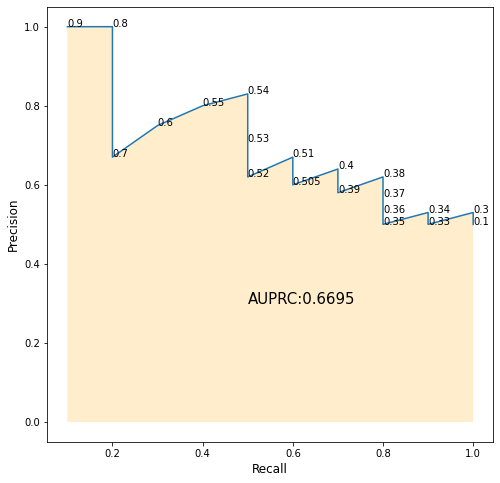

In [45]:
fig = plt.figure(figsize=(8,8))
plt.plot(recall, precision)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.fill_between(recall, precision, facecolor="orange", alpha=0.2) #alpha=투명도

for i in range(len(data['probability'])):
    plt.text(recall[i], precision[i], data['probability'][i])

plt.text(0.5, 0.3, 'AUPRC:' +str(AUPRC), fontsize=15)
plt.show()